# Heart Disease Prediction - PCA Analysis

This notebook covers:
1. Loading Preprocessed Data
2. PCA Implementation
3. Variance Analysis
4. Component Visualization
5. Transformed Data Export

In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/cleaned_cleveland.csv', header=0)
df.columns.tolist()


['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [18]:
# Step 1: Apply PCA while maintaining variance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Separate features and target

X = df.drop('target', axis=1)
y = df['target']

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (keep all components initially)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Create PCA-transformed DataFrame
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['target'] = y.values


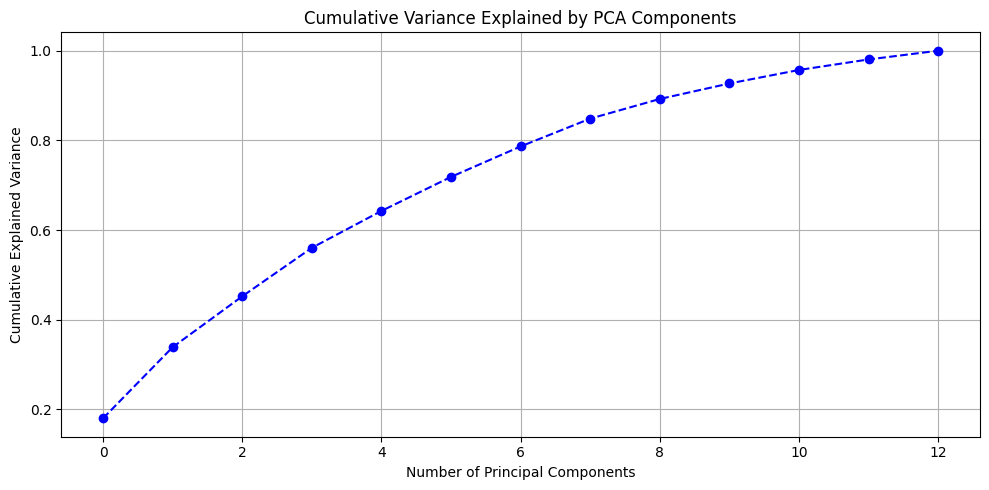

PC1: 0.1801
PC2: 0.1587
PC3: 0.1134
PC4: 0.1082
PC5: 0.0823
PC6: 0.0760
PC7: 0.0679
PC8: 0.0620
PC9: 0.0439
PC10: 0.0346
PC11: 0.0301
PC12: 0.0235
PC13: 0.0194


In [19]:
# Step 2: Determine optimal number of components using explained variance

# Plotting explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by PCA Components')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print variance explained per component
for i, var_ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var_ratio:.4f}")


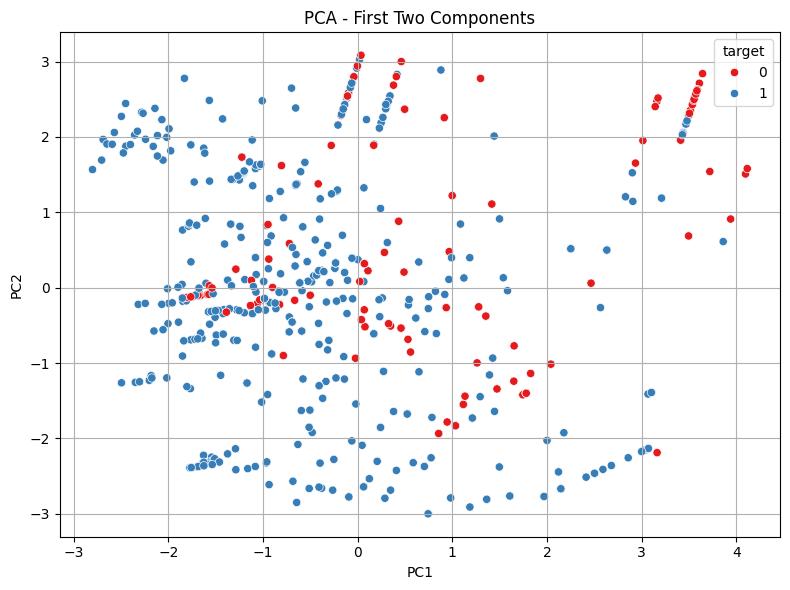

In [20]:
# 2D Scatter plot using first 2 principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['target'], palette='Set1')
plt.title('PCA - First Two Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,target
0,-1.786521,0.816441,-0.281865,-1.619744,0.655162,-1.097788,-0.423504,-0.175496,-0.510505,-0.677911,-0.675178,1.277075,0.511408,1
1,-1.625160,1.851279,-1.131125,0.677168,-0.409972,0.957735,-1.086122,-1.241409,0.803681,-1.172314,0.527727,0.010603,0.268237,1
2,-0.532601,0.345545,2.949366,-1.196082,0.230555,2.006274,0.208548,1.008130,-0.120851,-0.120021,0.385324,-0.102696,0.085897,1
3,-0.136811,0.201230,-1.740623,0.466221,-1.502348,2.005249,-0.394126,-0.545503,-1.632059,-0.628527,-0.735065,-0.544684,-1.064024,1
4,2.633485,0.499528,-0.579831,0.199420,-0.964987,-0.114746,0.744488,0.009446,-1.178598,0.252295,0.366463,0.856099,0.207026,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0.524432,-1.676246,0.705689,-0.029323,1.421441,-1.466213,-1.866790,-0.713841,-0.334210,0.929038,-0.406252,1.019253,-0.647321,1
860,-0.610519,0.064584,0.628453,-0.299655,-0.536088,-0.596907,0.572810,-0.813128,-0.301811,-0.523319,-0.204659,0.078317,-0.263634,1
861,1.134968,-1.439031,1.655580,0.921611,0.334921,-1.069792,-0.265710,-1.024317,-0.016600,1.306217,-1.733156,0.385068,-0.813940,0
862,1.497873,-2.377632,-2.359412,-0.135234,7.713385,1.636589,4.156988,-2.316945,-0.424814,-0.790057,-1.142214,0.551113,0.532381,1
